# Performing Principal Component Analysis (PCA) - Lab

## Introduction

Now that you have a high-level overview of PCA, as well as some of the details of the algorithm itself, it's time to practice implementing PCA on your own using the NumPy package. 

## Objectives

You will be able to:
    
* Implement PCA from scratch using NumPy

## Import the data

- Import the data stored in the file `'foodusa.csv'` (set `index_col=0`)
- Print the first five rows of the DataFrame 

In [24]:
import pandas as pd
data = pd.read_csv('foodusa.csv', index_col=0)
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


## Normalize the data

Next, normalize your data by subtracting the mean from each of the columns.

In [25]:
data = data - data.mean()
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,-0.791304,2.643478,11.604348,-22.891304,-7.165217
BALTIMORE,1.208696,-0.856522,5.204348,-28.391304,4.534783
BOSTON,4.408696,8.943478,-0.895652,1.008696,10.834783
BUFFALO,-2.491304,-5.256522,3.004348,15.408696,2.434783
CHICAGO,1.408696,-5.156522,0.404348,2.908696,2.434783


## Calculate the covariance matrix

The next step is to calculate the covariance matrix for your normalized data. 

In [26]:
cov_mat = data.cov()
cov_mat

,Bread,Burger,Milk,Oranges,Tomatoes
Bread,6.284466,12.910968,5.719051,1.310375,7.285138
Burger,12.910968,57.077115,17.507530,22.691877,36.294783
Milk,5.719051,17.507530,48.305889,-0.275040,13.443478
Oranges,1.310375,22.691877,-0.275040,202.756285,38.762411
Tomatoes,7.285138,36.294783,13.443478,38.762411,57.800553


## Calculate the eigenvectors

Next, calculate the eigenvectors and eigenvalues for your covariance matrix. 

In [27]:
import numpy as np
eig_values, eig_vectors = np.linalg.eig(cov_mat)

## Sort the eigenvectors 

Great! Now that you have the eigenvectors and their associated eigenvalues, sort the eigenvectors based on their eigenvalues to determine primary components!

In [28]:
# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eig_values)[::-1] 

# Sort 
eigenvectors_sorted = eig_vectors[:, e_indices]
eigenvectors_sorted

array([[-0.02848905, -0.16532108,  0.02135748, -0.18972574, -0.96716354],
       [-0.2001224 , -0.63218494,  0.25420475, -0.65862454,  0.24877074],
       [-0.0416723 , -0.44215032, -0.88874949,  0.10765906,  0.03606094],
       [-0.93885906,  0.31435473, -0.12135003, -0.06904699, -0.01521357],
       [-0.27558389, -0.52791603,  0.36100184,  0.71684022, -0.03429221]])

## Reprojecting the data

Finally, reproject the dataset using your eigenvectors. Reproject this dataset down to 2 dimensions.

In [29]:
transformed = eigenvectors_sorted[:, :2].T.dot(data.T).T

In [30]:
pd.DataFrame(transformed)

,0,1
0,22.476271,-10.084571
1,25.325818,-13.278372
2,-5.810981,-11.389537
3,-14.139856,5.965021
4,-2.426889,2.477207
5,2.165798,-6.663567
6,-5.788540,10.243124
7,-10.757365,12.621018
8,-7.185310,3.994880
9,-35.597059,-14.789443


In [31]:
df = pd.read_csv('foodusa.csv', index_col=0)
df.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, ATLANTA to WASHINGTON DC
Data columns (total 5 columns):
Bread       23 non-null float64
Burger      23 non-null float64
Milk        23 non-null float64
Oranges     23 non-null float64
Tomatoes    23 non-null float64
dtypes: float64(5)
memory usage: 1.1+ KB


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(2)
transformed2 = pca.fit_transform(df)
transformed2

array([[-22.47627135,  10.08457066],
       [-25.32581769,  13.27837213],
       [  5.81098064,  11.38953692],
       [ 14.13985584,  -5.96502128],
       [  2.42688912,  -2.47720723],
       [ -2.1657978 ,   6.66356692],
       [  5.78854031, -10.24312359],
       [ 10.75736512, -12.62101843],
       [  7.18530971,  -3.99487979],
       [ 35.59705933,  14.78944315],
       [  2.00346781,  -8.40384556],
       [ -3.93638626,  -2.64334177],
       [-22.62696885,  -3.1387347 ],
       [  8.73737565,  -6.06638331],
       [  2.97376841,  -4.41798128],
       [ 11.94020957,  20.41028996],
       [ -0.87176778,  10.49444408],
       [ 14.04114081,  -2.68904808],
       [ 10.7422955 ,  -5.27854662],
       [-15.0984763 , -11.31543052],
       [ -4.21030161,  -8.06785423],
       [-15.15432974,  -7.84414643],
       [-20.27814045,   8.05633901]])

In [ ]:
# These results are consistent, except that the signs have been reversed

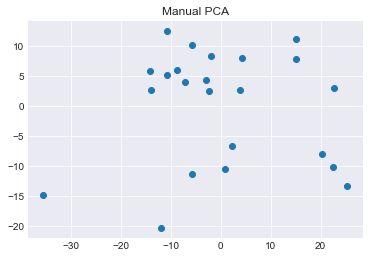

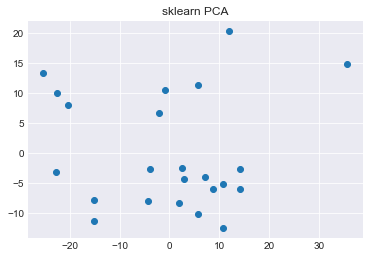

In [37]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('Manual PCA')
plt.show()
plt.scatter(transformed2[:, 0], transformed2[:, 1])
plt.title('sklearn PCA')
plt.show()

## Summary

Well done! You've now coded PCA on your own using NumPy! With that, it's time to look at further applications of PCA.